In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import seaborn as sns
import wandb

In [22]:
pd.options.display.max_seq_items = 2000
pd.options.display.max_columns = 500
pd.options.display.max_rows = 800
pd.options.display.max_colwidth = 200
pd.options.display.width = 800

In [23]:
os.getcwd()

'/Users/francesco/REPOS/name-clf/app'

In [24]:
base_url = '/Users/francesco/REPOS/name-clf/app'

In [25]:
os.chdir(base_url)

In [26]:
tag = "Country"

In [27]:
wandb.login()
PROJECT_NAME = f"{tag}-clf"
raw_data_filename = "raw-data"
with wandb.init(project=PROJECT_NAME, job_type="load-in-notebook") as run:
    artifact = run.use_artifact(raw_data_filename+":latest")
    artifact_dir = artifact.download()
    print(artifact_dir)
    data = pd.read_parquet(os.path.join(artifact_dir, raw_data_filename+".parquet.gzip"))
    print(data.shape)

wandb:   1 of 1 files downloaded.  


./artifacts/raw-data:v1
(8000, 3)


In [28]:
data.head()

,Name,Country,Gender
0,Jose,Spain,Male
1,Antonio,Spain,Male
2,Juan,Spain,Male
3,Manuel,Spain,Male
4,David,Spain,Male


In [29]:
print(data.isna().sum())

Name       0
Country    0
Gender     0
dtype: int64


Male      4000
Female    4000
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

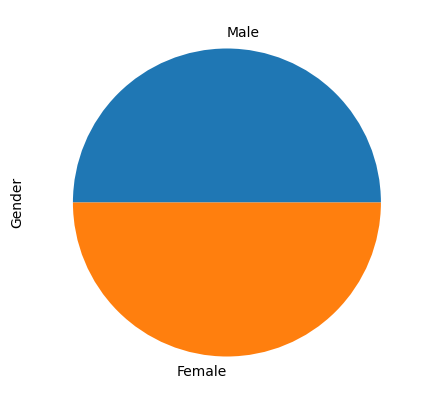

In [30]:
print(data["Gender"].value_counts())
data["Gender"].value_counts().plot(kind='pie', figsize=(5,5))

Spain    4000
Italy    4000
Name: Country, dtype: int64


<AxesSubplot:ylabel='Country'>

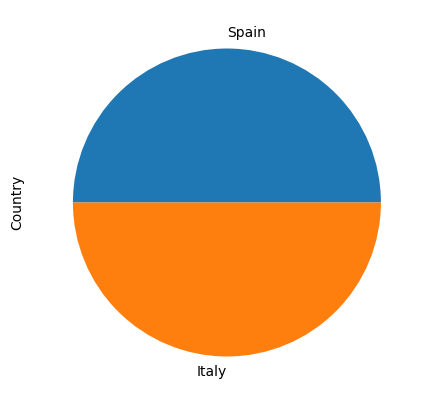

In [31]:
print(data["Country"].value_counts())
data["Country"].value_counts().plot(kind='pie', figsize=(5,5))

In [32]:
grouped = data.groupby("Country")
result = []
for gen, group in grouped:
    print(gen)
    #print(group["gender"].value_counts(sort=False))
    frame = group["Gender"].value_counts(sort=False)
    print("frame = ", frame)
    print("---")
    result.append({
        "Country": gen, 
        "Female" : group["Gender"].value_counts().values[0],
        "Male" : group["Gender"].value_counts().values[1],
        #"Neutral" : group["Gender"].value_counts().values[2],
        })
    #print(result)

result_df = pd.DataFrame(result)
result_df
    #print(gen)
    #print(group["gender"].value_counts())
    

Italy
frame =  Male      2000
Female    2000
Name: Gender, dtype: int64
---
Spain
frame =  Male      2000
Female    2000
Name: Gender, dtype: int64
---


,Country,Female,Male
0,Italy,2000,2000
1,Spain,2000,2000


<AxesSubplot:xlabel='Country', ylabel='Count'>

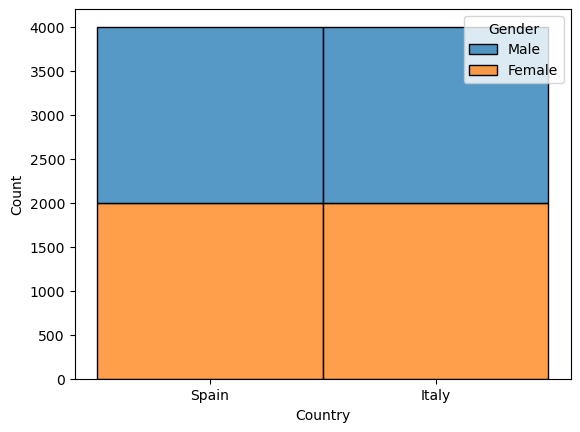

In [33]:
sns.histplot(data=data, x="Country", hue="Gender", multiple="stack")

In [36]:
dups = data[data.duplicated(subset=["Name"], keep=False)]
print(len(dups))
print(dups)

2342
         Name Country  Gender
1     Antonio   Spain    Male
3      Manuel   Spain    Male
4       David   Spain    Male
11     Daniel   Spain    Male
12     Sergio   Spain    Male
...       ...     ...     ...
7988     Pepi   Italy  Female
7989    Marga   Italy  Female
7991     Feli   Italy  Female
7996   Isaura   Italy  Female
7999     Nely   Italy  Female

[2342 rows x 3 columns]
